Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.4 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.1/931.1 kB 7.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.5 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 28.3 MB/s eta 0:00:00:00:0100:01
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=886533189666e635b47a78350d784bf1f92d1c411f645d315ec604ee45066ed4
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstal

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [4]:
# Load in the wine dataset
wine = datasets.load_wine()

In [10]:
#lol

In [5]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# Include the target as well
df['target'] = wine['target']

In [11]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df,test_size = 0.2, random_state = 0)

In [8]:
df_test.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.062778,2.193333,2.365000,19.258333,98.472222,2.438889,2.345278,0.355278,1.531111,5.108889,0.973611,2.711944,764.888889,0.777778
std,0.838600,1.128435,0.296016,2.930078,14.545468,0.668447,1.039207,0.112109,0.493893,2.085349,0.225644,0.657653,359.589828,0.721550
min,11.560000,0.920000,1.700000,14.000000,78.000000,0.980000,0.340000,0.190000,0.410000,2.000000,0.480000,1.330000,278.000000,0.000000
25%,12.367500,1.605000,2.167500,16.950000,86.750000,1.960000,1.642500,0.275000,1.250000,3.700000,0.850000,2.420000,480.000000,0.000000
50%,13.050000,1.745000,2.315000,19.000000,95.500000,2.575000,2.580000,0.330000,1.550000,5.045000,0.990000,2.850000,666.000000,1.000000
75%,13.765000,2.582500,2.497500,21.000000,111.250000,2.952500,2.992500,0.412500,1.890000,5.887500,1.120000,3.185000,1065.000000,1.000000
max,14.830000,5.800000,3.230000,28.500000,132.000000,3.520000,5.080000,0.630000,2.450000,10.800000,1.380000,3.690000,1680.000000,2.000000


In [12]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label ='target' ).fit(train_data = df_train, time_limit=120, presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240710_120942"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 18 14:00:06 UTC 2024
CPU Count:          2
Memory Avail:       6.42 GB / 7.46 GB (86.0%)
Disk Space Avail:   8589934588.42 GB / 8589934592.00 GB (100.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [13]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       LightGBMXT_BAG_L1   0.985915    accuracy       0.010737  16.540592                0.010737          16.540592            1       True          4
1  NeuralNetFastAI_BAG_L1   0.985915    accuracy       0.101161  29.467541                0.101161          29.467541            1       True          3
2     WeightedEnsemble_L3   0.985915    accuracy       0.101954  29.529907                0.000793           0.062367            3       True          7
3     WeightedEnsemble_L2   0.985915    accuracy       0.102206  29.518937                0.001045           0.051397            2       True          5
4  NeuralNetFastAI_BAG_L2   0.978873    accuracy       0.233681  75.110375                0.092259          29.093621            2       True          6
5   KNeighborsDist_B

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'LightGBMXT_BAG_L1': 0.9859154929577465,
  'WeightedEnsemble_L2': 0.9859154929577465,
  'NeuralNetFastAI_BAG_L2': 0.9788732394366197,
  'WeightedEnsemble_L3': 0.9859154929577465},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'NeuralNetFastAI_BAG_L1': ['NeuralNetFastAI_BAG_L1'],
  'LightGBMXT_BAG_L1': ['

<Axes: xlabel='model'>

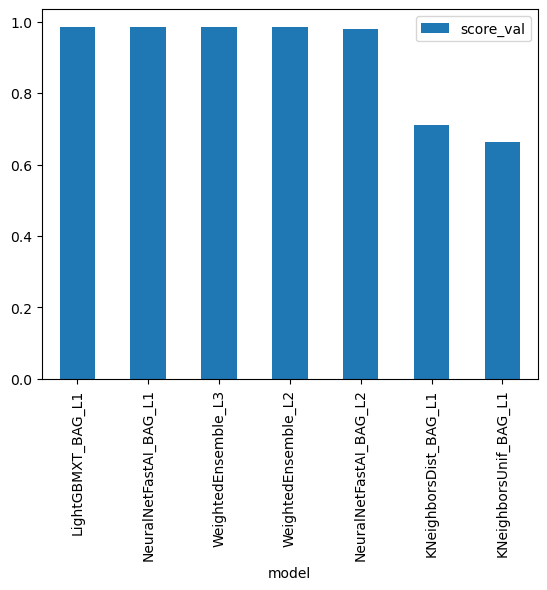

In [15]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent = True).plot(kind='bar', x='model',y='score_val')

In [17]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

In [18]:
performance

{'accuracy': 1.0, 'balanced_accuracy': 1.0, 'mcc': 1.0}

## AutoGluon Regression

In [19]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [20]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

# Include the target as well
dfd['target'] = diabetes['target']

In [21]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd,test_size = 0.2, random_state = 0)

In [ ]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(
    label="target", problem_type="regression", eval_metric="r2"
).fit(
    train_data=dfd_train,
    time_limit=120,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240710_121711"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 18 14:00:06 UTC 2024
CPU Count:          2
Memory Avail:       5.88 GB / 7.46 GB (78.8%)
Disk Space Avail:   8589934588.42 GB / 8589934592.00 GB (100.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
# Output the fit summary of the training run
predictor.fit_summary()

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)